# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# LGMVIP DATA SCIENCE INTERNSHIP

# INTERMEDIATE LEVEL TASK 02

# TASK : 2) Prediction using Decision Tree Algorithm

# NAME : SARANYA D

# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Importing some basic packages

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# read the data
df = pd.read_csv("Iris.csv")

In [45]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df.shape

(150, 6)

In [47]:
df.drop('Id', axis=1, inplace = True)

In [48]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.shape

(150, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [52]:
# data cleaning

In [53]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [54]:
df.duplicated().sum()

3

In [55]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

# Data Visualisation

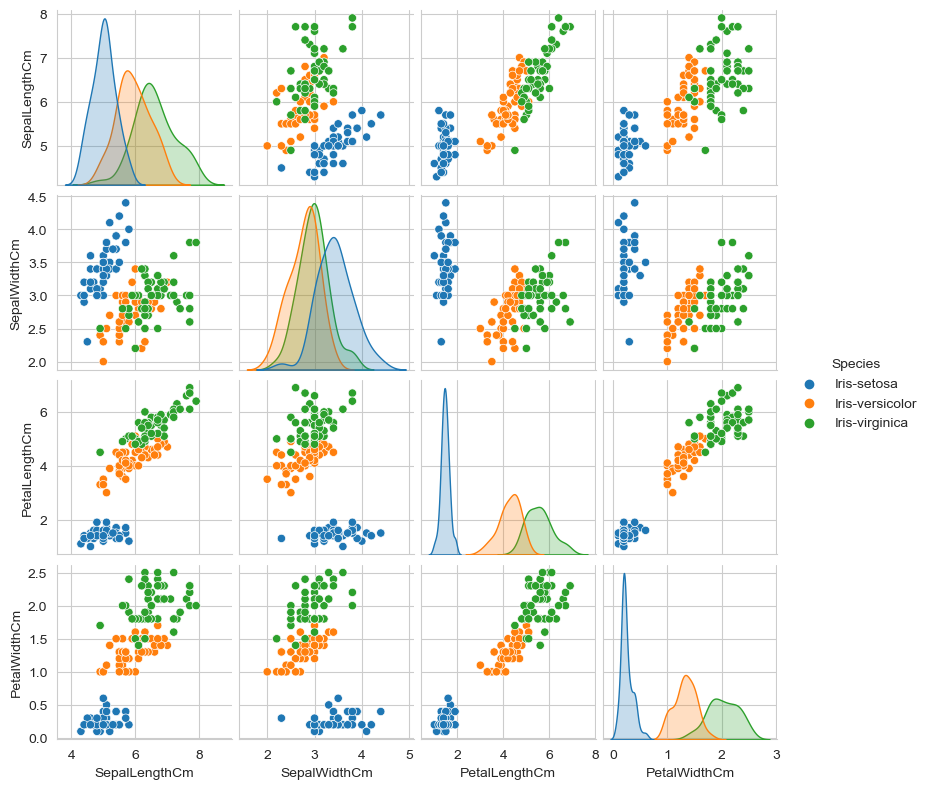

In [56]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Species', height = 2)
plt.show()

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


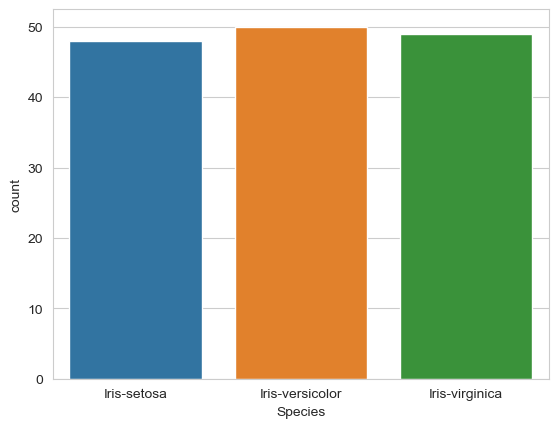

In [57]:
sns.countplot(df['Species'])
plt.show()

In [58]:
# replacing species with integer value to get the correlation matrix

In [59]:
df['Species'].replace({'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3}, inplace = True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [60]:
# Correlation matrix

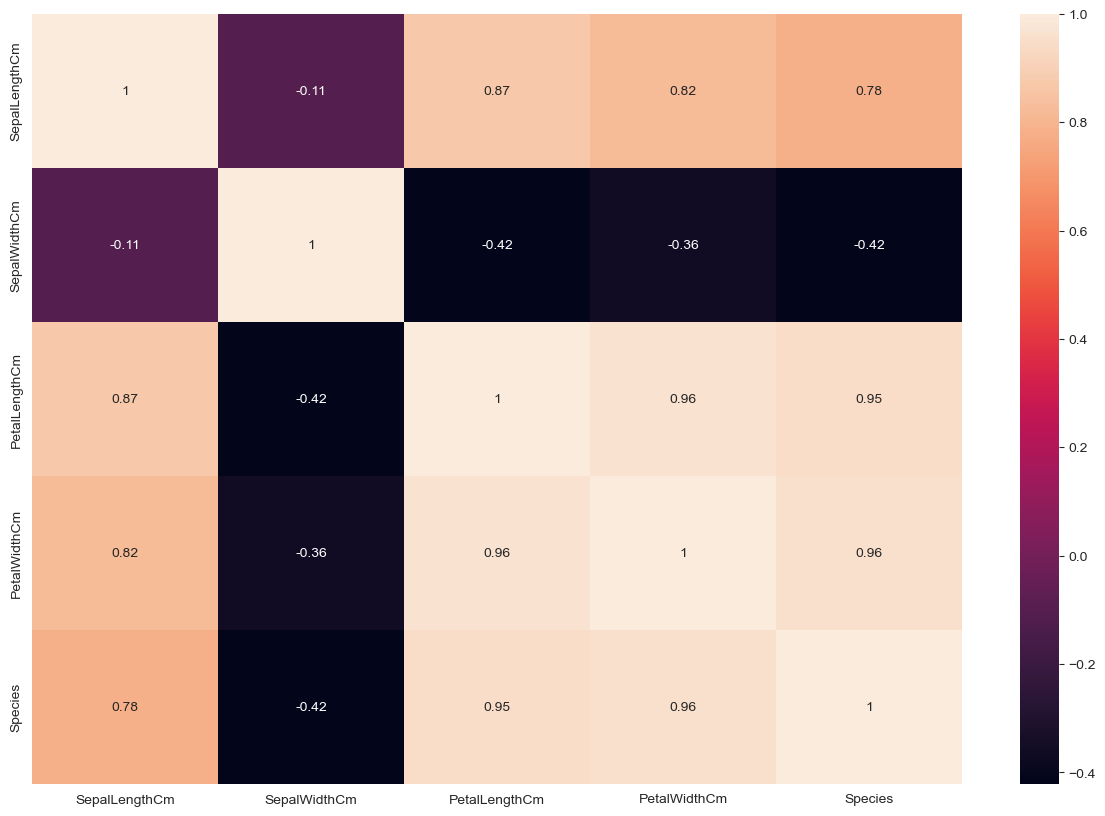

In [61]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [62]:
df.corr().round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.00,-0.11,0.87,0.82,0.78
SepalWidthCm,-0.11,1.00,-0.42,-0.36,-0.42
PetalLengthCm,0.87,-0.42,1.00,0.96,0.95
PetalWidthCm,0.82,-0.36,0.96,1.00,0.96
Species,0.78,-0.42,0.95,0.96,1.00


# Data preparation

In [63]:
X = df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df['Species']

In [64]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 147, dtype: int64

# Train_test_split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)

# fitting the model

Decisiontree Algorithm

In [67]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier()

In [69]:
model.fit(X,Y)

DecisionTreeClassifier()

In [70]:
tree.plot_tree(model)

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 147\nvalue = [48, 50, 49]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 99\nvalue = [0, 50, 49]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

In [71]:
tree.plot_tree(model,filled = True)

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 147\nvalue = [48, 50, 49]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 99\nvalue = [0, 50, 49]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

In [72]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [73]:
tree.plot_tree(model, filled = True, feature_names = X.columns)

[Text(0.5, 0.9166666666666666, 'PetalWidthCm <= 0.8\ngini = 0.667\nsamples = 147\nvalue = [48, 50, 49]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 99\nvalue = [0, 50, 49]'),
 Text(0.3076923076923077, 0.5833333333333334, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'PetalWidthCm <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'PetalWidthCm <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'SepalLengthCm <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text

In [74]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [75]:
model.score(X_train, Y_train)*100

100.0

In [76]:
model.score(X_test, Y_test)*100

93.33333333333333

# prediction

In [77]:
pred_model = model.predict(X_test)

In [78]:
pred_model

array([3, 2, 2, 3, 3, 3, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       1, 3, 3, 1, 2, 2, 3, 3], dtype=int64)

In [79]:
print(pred_model.shape)
print(Y_test.shape)

(30,)
(30,)


In [80]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,5.8,2.7,5.1,1.9
95,5.7,3.0,4.2,1.2
56,6.3,3.3,4.7,1.6
105,7.6,3.0,6.6,2.1
100,6.3,3.3,6.0,2.5
77,6.7,3.0,5.0,1.7
91,6.1,3.0,4.6,1.4
55,5.7,2.8,4.5,1.3
46,5.1,3.8,1.6,0.2
61,5.9,3.0,4.2,1.5


In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [82]:
#confusion matrix

In [83]:
cm = confusion_matrix(Y_test, pred_model)
cm

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  7]], dtype=int64)

In [84]:
#plotting the confusion matrix

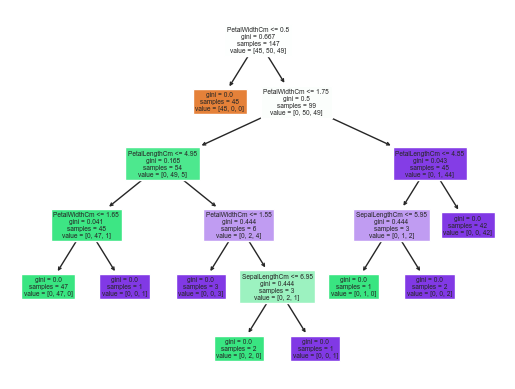

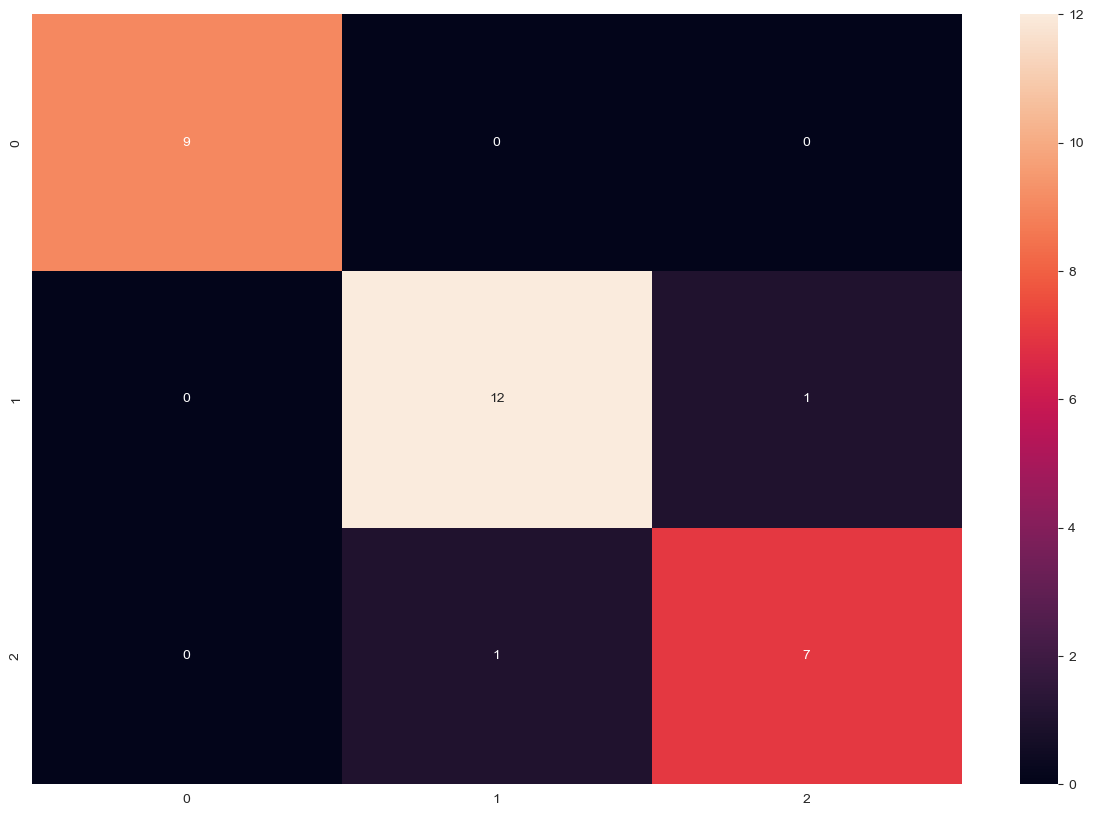

In [85]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [86]:
#classification report

In [87]:
print(classification_report(Y_test, pred_model))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.92      0.92      0.92        13
           3       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Accuracy

In [89]:
Decision_Tree_Accuracy = accuracy_score(Y_test, pred_model)
print("Accuracy is : ",Decision_Tree_Accuracy*100)

Accuracy is :  93.33333333333333
